In [1]:
def modified_colormap(colormap, central_color, central_width, blend_strength):    
    '''
    This function modifies a colormap to set the central region to be white. 
    Within the region specified by the 'width' parameter, the colormap is blended towards white using a linspace.
    
    Parameters:
        colormap (str): The name of an existing matplotlib colormap
        central_color (str): The name of an existing matplotlib color
        central_width (float): The width of the region to be set to white
        blend_strength (float): The width of the regions to be blended to white

    Returns:
        modified_colormap (matplotlib.colors.LinearSegmentedColormap): The modified colormap
    
    '''
    # Import libraries
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import colors as mcolors
    
    try:
        c = mcolors.cnames[central_color]
    except: 
        raise KeyError('Not a matplotlib named color')
        
    central_color = list(mcolors.to_rgba(central_color))
    
    # Raise an error if the width is not between 0 and 1
    if ((central_width < 0)+(central_width > 1)):
        raise ValueError('Central width must be in range [0, 1]')
    elif ((blend_strength < 0) + (blend_strength > 1)):
        raise ValueError('Blend strength must be in range [0, 1]')
    
    # Convert the widths to the range [0, 127]
    else:             
        central_width = int(127*central_width)
        blend_strength = int(blend_strength*(127-central_width))

    # Get the colormap values
    original_colormap = plt.cm.get_cmap(colormap)
    newcolors = original_colormap(np.linspace(0, 1, 256))
    
    # Get the value of the colormap 'width' values left of the center, and blend from that value to white at the center
    newcolors[128-central_width-blend_strength:128-central_width, :] = np.linspace(
        newcolors[128-central_width-blend_strength, :], 
        central_color, 
        blend_strength
    )
    
    newcolors[128-central_width:128+central_width, :] = central_color
    
    # Get the value of the colormap 'width' values right of the center, and blend from white at the center to that value
    newcolors[128+central_width:128+central_width+blend_strength, :] = np.linspace(
        central_color,
        newcolors[128+central_width+blend_strength, :], 
        blend_strength
    )
    
    # Create a new colormap object from the modified map
    modified_colormap = mcolors.LinearSegmentedColormap.from_list(colormap+'_modified', newcolors)
    
    return modified_colormap

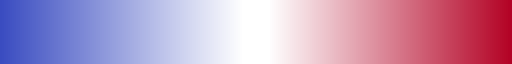

In [8]:
# modified_colormap('coolwarm', 'white', 0.4, 0.4)
modified_colormap('coolwarm', 'white', 0.05, 1.0)